### 단순 선형회귀 - 당뇨병 사례

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

- 당뇨병 데이터셋 탐색

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

In [3]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [4]:
df.describe()       # 이미 정규화 N(0, 0.0476)가 되어있는 데이터셋

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


- 10개의 feature와 target간의 상관관계도

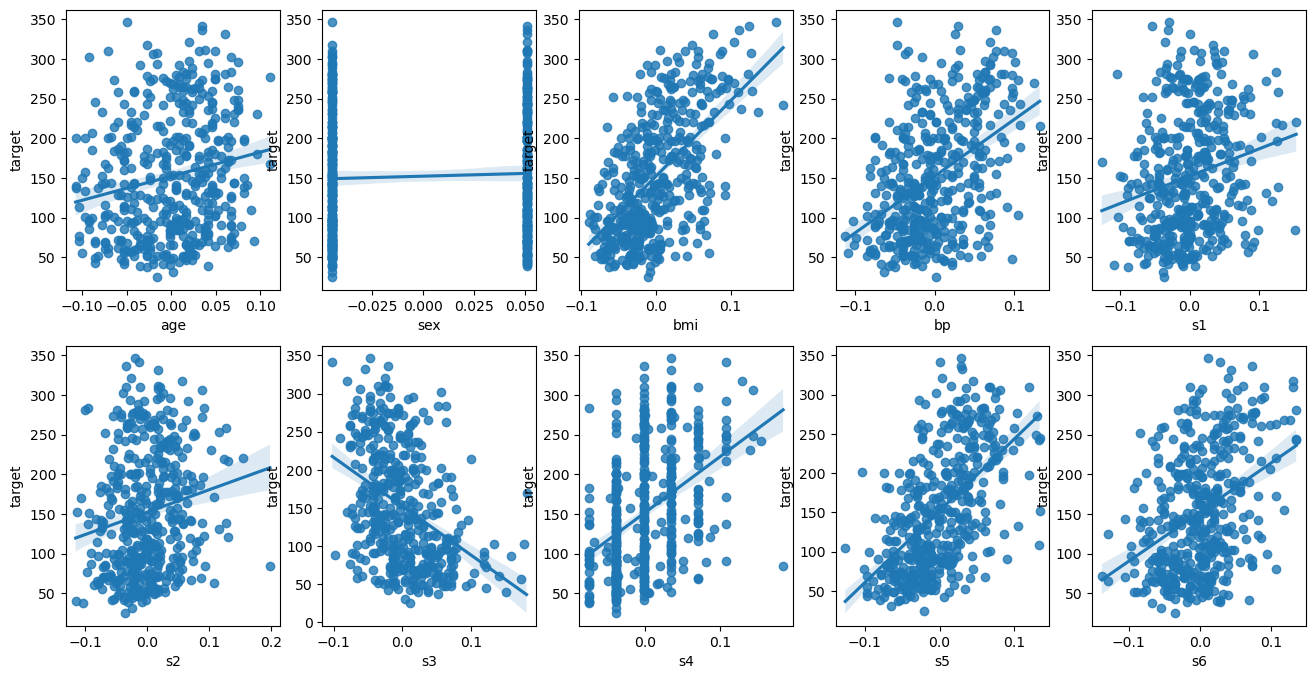

In [5]:
fig, axs = plt.subplots(2, 5, figsize=(16, 8))
for i, feature in enumerate(df.columns[:-1]):
    row, col = i // 5, i % 5
    sns.regplot(x=feature, y='target', data = df, ax=axs[row][col])

- 10개 feature vs target

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [7]:
# 각 feature와 target의 선형회귀를 했을 때의 R squared value
for feature in df.columns[:-1]:
    X = df[feature].values.reshape(-1, 1)
    lr.fit(X, diabetes.target)
    score = lr.score(X, diabetes.target)
    print(f'{feature}: {score:.4f}')

age: 0.0353
sex: 0.0019
bmi: 0.3439
bp: 0.1949
s1: 0.0450
s2: 0.0303
s3: 0.1559
s4: 0.1853
s5: 0.3202
s6: 0.1463


#### BMI vs. target

- 훈련 / 테스트 데이터셋 분리 (test_size=0.1)

In [8]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1, 1), df.target, random_state=2023, test_size=0.1
)

In [9]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [10]:
# 가중치(계수), 바이어스(편향, 절편)
lr.coef_, lr.intercept_

(array([950.04737294]), 150.97094830777968)

In [11]:
# R squared
lr.score(X_test, y_test)

0.290624152242407

In [12]:
# R squared, MSE
from sklearn.metrics import r2_score, mean_squared_error
pred = lr.predict(X_test)
r2_score(y_test, pred), mean_squared_error(y_test, pred)

(0.290624152242407, 4598.98205785851)

- 시각화

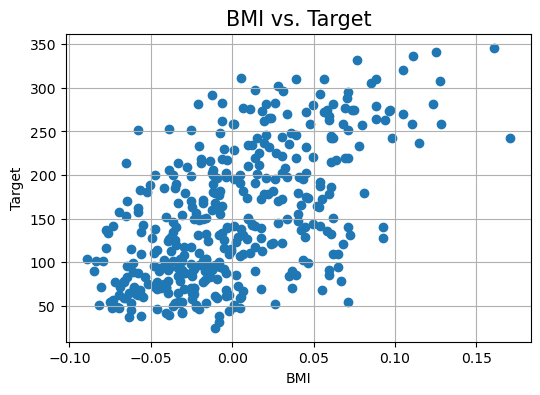

In [13]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train)
plt.grid()
plt.xlabel('BMI'), plt.ylabel('Target')
plt.title('BMI vs. Target', fontsize=15)
plt.show()

In [14]:
xs = np.array([-0.1, 0.18])
ys = np.dot(lr.coef_[0], xs) + lr.intercept_
ys

array([ 55.96621101, 321.97947544])

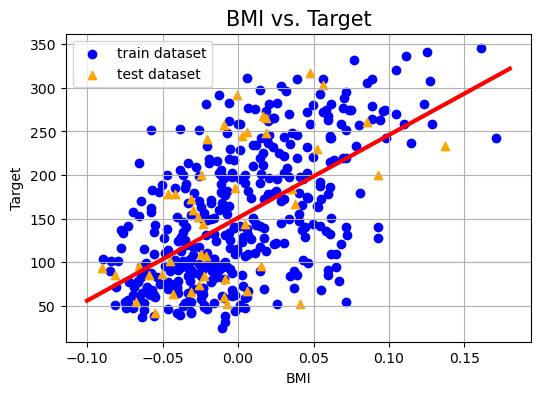

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, c='blue', label='train dataset')
plt.plot(xs, ys, 'r-', lw=3)
plt.scatter(X_test, y_test, marker='^', label='test dataset', c='orange')
plt.grid(), plt.legend()
plt.xlabel('BMI'), plt.ylabel('Target')
plt.title('BMI vs. Target', fontsize=15)
plt.show()

#### BP vs. target

In [16]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df.bp.values.reshape(-1, 1), diabetes.target, test_size=0.1, random_state=2023
)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)

LinearRegression()

In [24]:
pred2 = lr.predict(X_test2)
r2_score(y_test2, pred2), mean_squared_error(y_test2, pred2)

(0.2498575531351197, 4863.277576865795)

In [18]:
df.bp.min(), df.bp.max()

(-0.11239880254408448, 0.13204361674121307)

In [19]:
xs2 = np.array([-0.12, 0.14])
ys2 = np.dot(lr.coef_[0], xs) + lr.intercept_

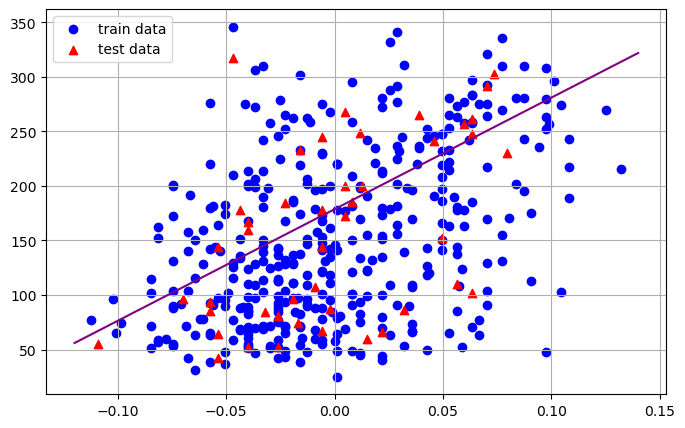

In [20]:
plt.figure(figsize=(8, 5))
plt.scatter(X_train2, y_train2, c='blue', label='train data')
plt.plot(xs2, ys2, c='purple')
plt.scatter(X_test2, y_test2, c='red', marker='^', label='test data')
plt.grid(), plt.legend();

- 두개의 지표 비교

In [25]:
r2_score(y_test, pred), r2_score(y_test2, pred2)

(0.290624152242407, 0.2498575531351197)

In [26]:
mean_squared_error(y_test, pred), mean_squared_error(y_test2, pred2)

(4598.98205785851, 4863.277576865795)

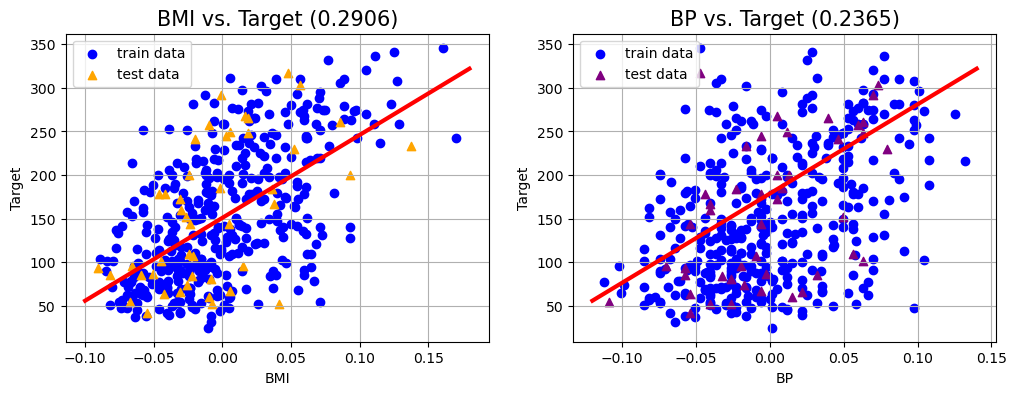

In [37]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train, y_train, c='blue', label='train data')
plt.plot(xs, ys, 'r-', lw=3)
plt.scatter(X_test, y_test, marker='^', label='test data', c='orange')
plt.grid(), plt.legend()
plt.xlabel('BMI'), plt.ylabel('Target')
plt.title('BMI vs. Target (0.2906)', fontsize=15)
plt.subplot(122)
plt.scatter(X_train2, y_train2, c='blue', label='train data')
plt.plot(xs2, ys2, c='red', lw=3)
plt.xlabel('BP'), plt.ylabel('Target')
plt.scatter(X_test2, y_test2, c='purple', marker='^', label='test data')
plt.title('BP vs. Target (0.2365)', fontsize=15)
plt.grid(), plt.legend();